<a href="https://colab.research.google.com/github/wksiazak/Heart_disease_Boosting-Bagging_use/blob/master/Heart_disease_Bagging%26Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initial data analysis

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)

In [4]:
heart_disease = pd.read_csv('heart_disease.csv')

In [5]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23391 entries, 0 to 23390
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  23391 non-null  float64
 1   HighBP                23391 non-null  float64
 2   HighChol              23391 non-null  float64
 3   CholCheck             23391 non-null  float64
 4   BMI                   23391 non-null  float64
 5   Smoker                23391 non-null  float64
 6   Stroke                23391 non-null  float64
 7   Diabetes              23391 non-null  float64
 8   PhysActivity          23391 non-null  float64
 9   Fruits                23390 non-null  float64
 10  Veggies               23390 non-null  float64
 11  HvyAlcoholConsump     23390 non-null  float64
 12  AnyHealthcare         23390 non-null  float64
 13  NoDocbcCost           23390 non-null  float64
 14  GenHlth               23390 non-null  float64
 15  MentHlth           

In [6]:
heart_disease.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  1
Veggies                 1
HvyAlcoholConsump       1
AnyHealthcare           1
NoDocbcCost             1
GenHlth                 1
MentHlth                1
PhysHlth                1
DiffWalk                1
Sex                     1
Age                     1
Education               1
Income                  1
dtype: int64

In [7]:
heart_disease.shape

(23391, 22)

In [8]:
heart_disease_up = heart_disease.dropna()

In [9]:
heart_disease_up.shape

(23390, 22)

In [10]:
heart_disease.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [11]:
correlation = heart_disease.corr()

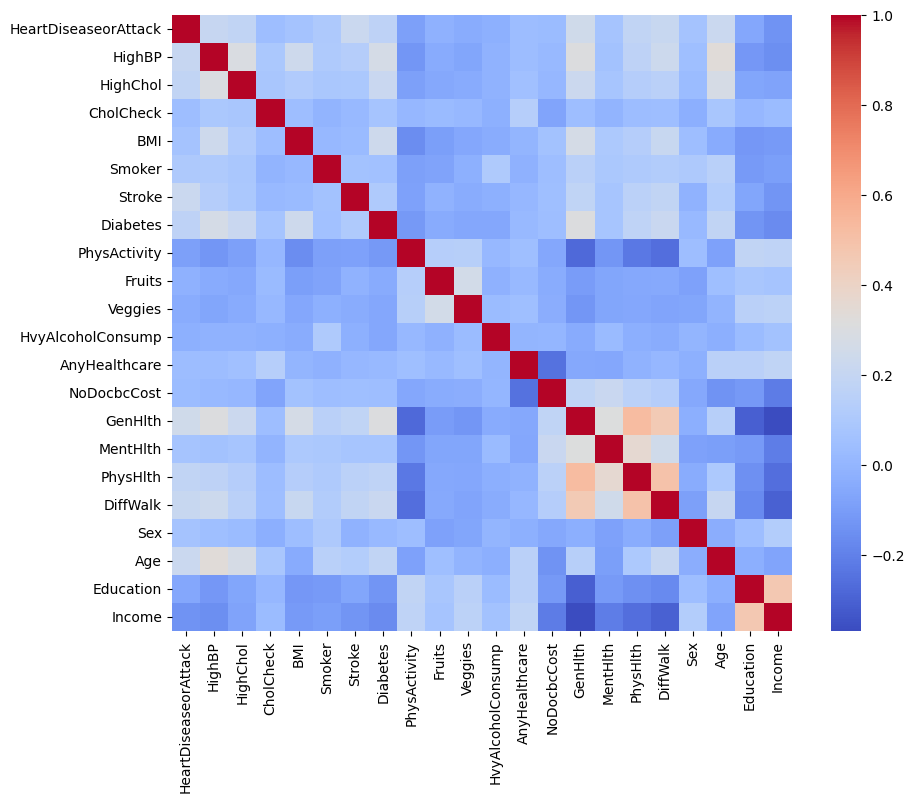

In [12]:
plt.figure(figsize = (10,8))
sns.heatmap(correlation, cmap = 'coolwarm')
plt.show()

In [13]:
y = heart_disease_up.pop('HeartDiseaseorAttack')
X = heart_disease_up

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Bagging with KNeighborsClassifier

In [15]:
bagging_model_knn = BaggingClassifier(base_estimator = KNeighborsClassifier(), n_estimators=10, random_state=123)

In [16]:
bagging_model_knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=123)

In [17]:
y_pred_test_bag_knn = bagging_model_knn.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred_test_bag_knn))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      5347
         1.0       0.28      0.07      0.11       501

    accuracy                           0.91      5848
   macro avg       0.60      0.52      0.53      5848
weighted avg       0.86      0.91      0.88      5848



Very low precision in identyfing heart disease or heart attack

## Bagging with SVM

In [19]:
bagging_model_svm = BaggingClassifier(base_estimator = SVC(), n_estimators=10, random_state=123)

In [20]:
bagging_model_svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), random_state=123)

In [21]:
y_pred_test_bag_svm = bagging_model_svm.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred_test_bag_svm))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96      5347
         1.0       0.00      0.00      0.00       501

    accuracy                           0.91      5848
   macro avg       0.46      0.50      0.48      5848
weighted avg       0.84      0.91      0.87      5848



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

In [23]:
rf = RandomForestClassifier(n_estimators=10, random_state=123, max_depth=5, class_weight = 'balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10,
                       random_state=123)

In [24]:
y_pred_rf = rf.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.97      0.73      0.83      5347
         1.0       0.21      0.76      0.33       501

    accuracy                           0.73      5848
   macro avg       0.59      0.75      0.58      5848
weighted avg       0.91      0.73      0.79      5848



## Random Forest on SMOTE data set

In [26]:
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [27]:
Counter(y_train_smote)

Counter({0.0: 15896, 1.0: 15896})

In [28]:
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10,
                       random_state=123)

In [29]:
y_pred_rf_smote = rf.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred_rf_smote))

              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      5347
         1.0       0.26      0.55      0.36       501

    accuracy                           0.83      5848
   macro avg       0.61      0.70      0.63      5848
weighted avg       0.89      0.83      0.85      5848



In above cases Bagging with KNN model is giving the best accuracy and at the same is able to predict also cases with heart attack (class 1), while in SVM model - there is no prediction for heart attack group.  

However we see that Ramdom Forest (which is specifed example of Bagging) is giving the best accuracy and is able to predict both classes with quite good precision, especially in  Random Forest model in SMOTE technique for balancing data were used.   

## Boosting

## Ada Boost

In [32]:
adb = AdaBoostClassifier(n_estimators=10, random_state = 0 )
adb.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=0)

In [33]:
y_pred_train_ab = adb.predict(X_train)
y_pred_test_ab = adb.predict(X_test)

In [36]:
print('Accuracy on train data set ', accuracy_score(y_train, y_pred_train_ab))
print('Accuracy on test data set: ', accuracy_score(y_test, y_pred_test_ab))

Accuracy on train data set  0.9047429027476912
Accuracy on test data set:  0.9081737346101231


In [46]:
print(classification_report(y_test, y_pred_test_ab))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      5347
         1.0       0.42      0.19      0.26       501

    accuracy                           0.91      5848
   macro avg       0.67      0.58      0.61      5848
weighted avg       0.88      0.91      0.89      5848



## Gradient Boost

In [37]:
gb = GradientBoostingClassifier(n_estimators=10, random_state=0, learning_rate=1.0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=10, random_state=0)

In [38]:
y_pred_train_gb = adb.predict(X_train)
y_pred_test_gb = adb.predict(X_test)

In [39]:
print('Accuracy on train data set: ', accuracy_score(y_train, y_pred_train_gb))
print('Accuracy on test data set: ', accuracy_score(y_test, y_pred_test_gb))

Accuracy on train data set:  0.9047429027476912
Accuracy on test data set:  0.9081737346101231


In [45]:
print(classification_report(y_test, y_pred_test_gb))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      5347
         1.0       0.42      0.19      0.26       501

    accuracy                           0.91      5848
   macro avg       0.67      0.58      0.61      5848
weighted avg       0.88      0.91      0.89      5848



## XG Boost

In [40]:
model_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
y_pred_train_xb = model_xgb.predict(X_train)
y_pred_test_xb = model_xgb.predict(X_test)

In [43]:
print('Accuracy on train data set: ', accuracy_score(y_train, y_pred_train_xb))
print('Accuracy na test data set: ', accuracy_score(y_test, y_pred_test_xb))

Accuracy on train data set:  0.9171702200433246
Accuracy na test data set:  0.9127906976744186


In [44]:
print(classification_report(y_test, y_pred_test_xb))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      5347
         1.0       0.45      0.09      0.15       501

    accuracy                           0.91      5848
   macro avg       0.69      0.54      0.55      5848
weighted avg       0.88      0.91      0.88      5848



## Summary

All type of boosting is providing better **accuracy** for model and **precision **for detecting heart attacks  than Baggings models.  

However especialy in medical data types we need to pay atention on **recall** metric  -> in models using Boosting accuracy in total is higher, but recall is lower than in Random Forest Model.  In XGBoost recall is only 9% for heart attacks while in Random Forest it is roughly 55%.